# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [ ]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 2/4)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku dane.csv do tablicy `eruptions_data` w taki sposób, aby kolumna Eruption Number stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [3]:
eruptions_data = pd.read_csv("eruptions_data.csv", index_col="Eruption Number")

eruptions_data.head()


,Volcano Name,Eruption Category,Evidence Type,Evidence Method,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,Observations,Reported,2,2022,10.0,21.0,2022.0,12.0,19.0
22481,Taal,Confirmed,Observations,Reported,1,2022,10.0,5.0,2022.0,10.0,29.0
22458,Turrialba,Confirmed,Observations,Reported,1,2022,7.0,17.0,2022.0,7.0,17.0
22453,Ulawun,Confirmed,Observations,Reported,2,2022,6.0,2.0,2022.0,6.0,2.0
22454,Raung,Confirmed,Observations,Satellite (infrared),2,2022,5.0,14.0,2022.0,9.0,27.0


### Zadanie 2: Przegląd danych - wybrane elementy [5 pkt]

#### a) Największe erupcje
Przygotuj i wyświetl tablicę `big_eruptions_data` zawierającą tylko i wyłącznie wiersze tablicy `eruptions_data` dotyczące erupcji, którym została przyporządkowana wartość VEI równa 7.

In [4]:
big_eruptions_data = eruptions_data[eruptions_data["VEI"] == 7]
big_eruptions_data.head()

,Volcano Name,Eruption Category,Evidence Type,Evidence Method,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day
Eruption Number,,,,,,,,,,,
16231,Tambora,Confirmed,Observations,Reported,7,1812,NaN,NaN,1815.0,7.0,15.0
20843,Rinjani,Confirmed,Sidereal,Ice Core,7,1257,7.0,1.0,NaN,NaN,NaN
13879,Santorini,Confirmed,Isotopic,14C (calibrated),7,-1610,NaN,NaN,NaN,NaN,NaN
20904,"Blanco, Cerro",Confirmed,Isotopic,14C (calibrated),7,-2300,NaN,NaN,NaN,NaN,NaN
16980,Kikai,Confirmed,Isotopic,14C (uncalibrated),7,-4350,NaN,NaN,NaN,NaN,NaN


In [5]:
### Komórka testowa
assert set(big_eruptions_data['Volcano Name'].index) == set([16231, 20843, 13879, 20904, 16980, 20610, 18903])
assert set(big_eruptions_data['Volcano Name'].values) == set(['Tambora', 'Rinjani', 'Santorini', 'Blanco, Cerro', 'Kikai', 'Crater Lake', 'Kurile Lake'])

#### b) Najaktywniejsze wulkany
Przygotuj tablicę `most_active_data` zawierającą następujące elementy:

Indeks:
- domyślny

Kolumny:
- Volcano - nazwy wulkanów
- Recorded eruptions - liczba zarejestrowanych erupcji

Dane w tablicy powinny być posortowane od największej do najmniejszej liczby zarejestrowanych erupcji, a w przypadku takiej samej liczby erupcji alfabetycznie po nazwach wulkanów.

Wyświetl przygotowaną tablicę w taki sposób aby widoczne było 10 pierwszych wierszy, a zawarte w tablicy liczby wyświetlały się bez miejsc po przecinku.

In [6]:
recorded_eruptions = eruptions_data["Volcano Name"].value_counts()
most_active_data = pd.DataFrame({
    "Volcano":  recorded_eruptions.index,
    "Recorded eruptions": list(recorded_eruptions)
})


In [7]:
### Komórka testowa
assert list(most_active_data.loc[:9, "Volcano"]) == ['Fournaise, Piton de la', 'Asosan', 'Villarrica', 'Asamayama', 'Etna',
                                                         'Mauna Loa', 'Klyuchevskoy','Sheveluch', 'Gamalama', 'Merapi']
assert list(most_active_data.loc[:9, "Recorded eruptions"]) == [191, 180, 152, 128, 121, 110, 104, 102,  81,  81]

#### c) Ostatnie erupcje o określonej wielkości
Przygotuj zmienną `last_eruption_data` zawierającą tablicę zawierającą następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny:
- Last recorded eruption - lata, w których ostatni raz zarejestrowano erupcję o określonej wartości VEI (na podstawie daty początku erupcji).

Wyświetl przygotowaną tablicę w taki sposób aby zawarte w niej liczby wyświetlały się bez miejsc po przecinku.

In [8]:
temp = eruptions_data[["VEI", "Start Year"]]
temp.set_index("VEI", inplace=True)
last_eruption_year = list(temp.groupby("VEI").max()["Start Year"])

last_eruption_data = pd.DataFrame({
    "VEI": range(0, 8),
    "Last recorded eruption": list(temp.groupby("VEI").max()["Start Year"])
} )
last_eruption_data.index.name = "VEI"
last_eruption_data


,VEI,Last recorded eruption
VEI,,
0,0,2021
1,1,2022
2,2,2022
3,3,2021
4,4,2021
5,5,2021
6,6,1991
7,7,1812


In [9]:
### Komórka testowa
assert (last_eruption_data.index.name == 'VEI') == True
assert list(last_eruption_data['Last recorded eruption'].index) == [0, 1, 2, 3, 4, 5, 6, 7]
assert list(last_eruption_data['Last recorded eruption'].values) == [2021, 2022, 2022, 2021, 2021, 2021, 1991, 1812]

### Zadanie 3: Konstrukcja szeregów rodzielczych - wersja podstawowa [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablic zawierających następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny:
- f - zliczenia poszczególnych kategorii (ang. frequency, absolute frequency),
- cf - zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),
- rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency),
- crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency).

Przygotuj osobne tablice dla wszystkich erupcji (`vei_data_1`), erupcji potwierdzonych (`vei_data_2`) i erupcji niepotwierdzonych (`vei_data_3`).

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [46]:
data["Eruption Category"].unique()

array(['Confirmed', 'Uncertain'], dtype=object)

In [53]:
data = eruptions_data.copy()
vei_data_1 = pd.DataFrame({
    "VEI": range(0, 8),
    "f": data.groupby("VEI")["Volcano Name"].count(), # zliczanie poszczrgolnych kategorii
    "cf": np.cumsum(data.groupby("VEI")["Volcano Name"].count()), # suma skumulowana
    "rf": data.groupby("VEI")["Volcano Name"].count() / len(data["VEI"]), # częstość zliczeń poszczególnych kategorii 
    "crf": np.cumsum(data.groupby("VEI")["Volcano Name"].count()) / len(data) #skumulowana częstość zliczeń poszczególnych kategorii
})
vei_data_1

,VEI,f,cf,rf,crf
VEI,,,,,
0,0,1007,1007,0.121545,0.121545
1,1,1384,2391,0.167049,0.288594
2,2,3991,6382,0.481714,0.770308
3,3,1152,7534,0.139046,0.909354
4,4,511,8045,0.061678,0.971032
5,5,180,8225,0.021726,0.992758
6,6,53,8278,0.006397,0.999155
7,7,7,8285,0.000845,1.000000


In [54]:
data_confirmed = data[data["Eruption Category"] == "Confirmed"]
vei_data_2 = pd.DataFrame({
    "VEI": range(0, 8),
    "f": data_confirmed.groupby("VEI")["Volcano Name"].count(), # zliczanie poszczrgolnych kategorii
    "cf": np.cumsum(data_confirmed.groupby("VEI")["Volcano Name"].count()), # suma skumulowana
    "rf": data_confirmed.groupby("VEI")["Volcano Name"].count() / len(data_confirmed), # częstość zliczeń poszczególnych kategorii 
    "crf": np.cumsum(data_confirmed.groupby("VEI")["Volcano Name"].count()) / len(data_confirmed) #skumulowana częstość zliczeń poszczególnych kategorii
})
vei_data_2

,VEI,f,cf,rf,crf
VEI,,,,,
0,0,803,803,0.105105,0.105105
1,1,1227,2030,0.160602,0.265707
2,2,3727,5757,0.487827,0.753534
3,3,1133,6890,0.148298,0.901832
4,4,510,7400,0.066754,0.968586
5,5,180,7580,0.023560,0.992147
6,6,53,7633,0.006937,0.999084
7,7,7,7640,0.000916,1.000000


In [71]:
data_unconfirmed = data[data["Eruption Category"] == "Uncertain"]
vei_data_3 = pd.DataFrame({
    "VEI": range(0, 5),
    "f": data_unconfirmed.groupby("VEI")["Volcano Name"].count(), # zliczanie poszczrgolnych kategorii
    "cf": np.cumsum(data_unconfirmed.groupby("VEI")["Volcano Name"].count()), # suma skumulowana
    "rf": data_unconfirmed.groupby("VEI")["Volcano Name"].count() / len(data_unconfirmed), # częstość zliczeń poszczególnych kategorii 
    "crf": np.cumsum(data_unconfirmed.groupby("VEI")["Volcano Name"].count()) / len(data_unconfirmed) #skumulowana częstość zliczeń poszczególnych kategorii
})
vei_data_3

,VEI,f,cf,rf,crf
VEI,,,,,
0,0,204,204,0.316279,0.316279
1,1,157,361,0.243411,0.559690
2,2,264,625,0.409302,0.968992
3,3,19,644,0.029457,0.998450
4,4,1,645,0.001550,1.000000


In [58]:
### Komórka testowa
# Test 1: Wszystkie erupcje
assert (vei_data_1.index.name == 'VEI') == True
assert len(set(list(vei_data_1.columns)) & set(['f', 'cf', 'rf', 'crf'])) == 4
assert list(vei_data_1['f'].index) == [0, 1, 2, 3, 4, 5, 6, 7]
assert list(vei_data_1['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
# Test 2: Tylko potwierdzone erupcje
assert (vei_data_2.index.name == 'VEI') == True
assert len(set(list(vei_data_2.columns)) & set(['f', 'cf', 'rf', 'crf'])) == 4
assert list(vei_data_2['f'].index) == [0, 1, 2, 3, 4, 5, 6, 7]
assert list(vei_data_2['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
# Test 3: Tylko niepotwierdzone erupcje
assert (vei_data_3.index.name == 'VEI') == True
assert len(set(list(vei_data_3.columns)) & set(['f', 'cf', 'rf', 'crf'])) == 4
assert list(vei_data_3['f'].index) == [0, 1, 2, 3, 4]
assert list(vei_data_3['f'].values) == [204, 157, 264, 19, 1]

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

KeyError: 1

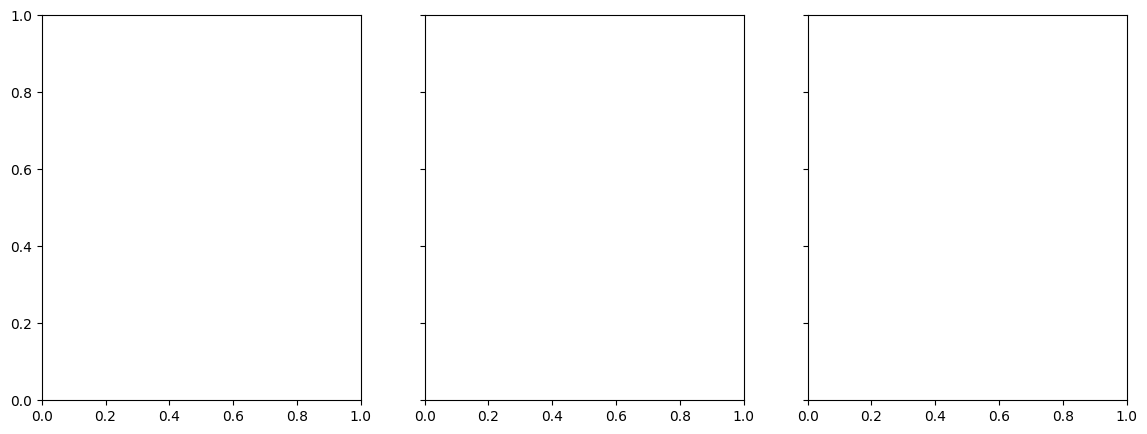

In [67]:
# przygotowanie wykresów

# zakresy osi
x_ticks = vei_data_1["VEI"]
y1_ticks = np.arange(0, 10, 2)
y2_ticks = np.arange(0, 1.2, 0.2)

# kolory
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# figura z trzema wykresami
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 5), sharey=True)

# wykres 1 - wszystkie erupcje
axs[0].bar(x_ticks, vei_data_1[1], color=colors[0], alpha=0.7)
axs